# **Handwritten Digit Recognition**

-------------

## **Objective**

1. Build a machine learning model which correctly identifies handwritten digits with at least 93% accuracy.
2. Use different machine learning algorithms to learn what works best for this application.

## **Data Source**

Modified National Institute of Standards and Technology

## **Import Library**

In [1]:
#importing pandas library and assigning it as 'pd' for simplicity.
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB

## **Import Data**

In [2]:
#reading the dataset using a method[read_csv()] of pandas library and creating a dataframe 'data'
data = pd.read_csv('Dataset.csv')


## **Describe Data**

In [3]:
#using info() method to get the statistics of the dataframe.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13999 entries, 0 to 13998
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 83.8 MB


1. The dataset from MINST (Modified National Institute of Standards and Technology) is used for this project.
2. Dataset is a .CSV file and has around 14000 entries of handwritten digits ranging from 0 to 9.
3. Each entry is a greyscale image of digit. Image size is 28 pixels * 28 pixels.
4. So, there are 784 (28*28) pixels in each image, each pixel representing a column (feature variable).
5. The coumns are represented by the number of pixel in the image such as pixel0, pixel1, pixel3, _ _ _ and so on	
6. Pixel can have any value between 0 to 255 depending on the lightness or the darkness of that pixel. 0 beign lightest and 255 beign darkest.
7. First column represents the number drawn in the image. It is repesented by name label (target variable)

In [4]:
#using head() method to check first and last five entries.
data.head(-5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13990,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13991,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13992,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Data Preprocessing**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13999 entries, 0 to 13998
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 83.8 MB


In [6]:
#Using isnull() method to search empty cells 
data.isnull().sum().sum()

0

## **Define Target Variable (y) and Feature Variables (X)**

In [7]:
#Defining feature variables
#Drop() method is used drop the column 'label' and select other columns as features
X = data.drop(['label'],axis=1)

In [8]:
#Defining target variable
y = data['label']

## **Train Test Split**

In [9]:
# importing train_test_split from sklearn to split the dataset
# here size of the train dataset is 70% and remaining 30% is test dataset.
# random state is stated as 252 to make sure the split will generate same result every time code is run.
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, random_state = 252)

## **Modeling using SUPPORT VECTOR MACHINE**

In [10]:
# importing support vector machine classification algorithm from sklearn
# using support vector classifier to train the model
model_1 = svm.SVC()

In [12]:
# training the model using fit() method
model_1.fit(X_train, y_train)

SVC()

## **Model Evaluation**

**Accuracy**

In [13]:
#using score() method for accuracy
model_1.score(X_test, y_test)

0.9580952380952381

## **Prediction**

In [14]:
# predicting the model for the test data set 
# the predicted target values(numbers in img) are stored in y_pred array
y_pred_1 = model_1.predict(X_test)

## **Classification Report and Confusion Matrix**

In [15]:
# using crosstab method to print confusion matrix or frequency table
cm_1 = pd.crosstab(y_pred_1,y_test,margins=True)
cm_1

label,0,1,2,3,4,5,6,7,8,9,All
row_0,,,,,,,,,,,
0,388,0,1,1,0,3,4,1,1,3,402
1,0,449,3,2,0,1,0,4,3,1,463
2,0,0,405,5,0,1,0,6,1,2,420
3,0,1,4,396,0,6,0,2,3,6,418
4,1,1,5,0,407,1,1,2,1,10,429
5,2,1,0,9,0,372,3,0,5,0,392
6,0,1,4,0,1,4,426,0,2,0,438
7,0,0,3,3,0,0,0,397,0,9,412
8,4,1,6,6,0,0,0,0,372,2,391


In [16]:
# importing classification report to find out precision,recall and overall accuracy of model
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       395
           1       0.97      0.98      0.98       456
           2       0.96      0.94      0.95       431
           3       0.95      0.94      0.94       422
           4       0.95      0.96      0.96       422
           5       0.95      0.96      0.95       388
           6       0.97      0.98      0.98       434
           7       0.96      0.95      0.96       417
           8       0.95      0.95      0.95       390
           9       0.95      0.93      0.94       445

    accuracy                           0.96      4200
   macro avg       0.96      0.96      0.96      4200
weighted avg       0.96      0.96      0.96      4200



## **Explaination**

*   True Positive (TP) - Intersection of corresponding row and column. eg- in case of 2 its 405
*   False Positive (FP) - sum of values in corresponding row excluding TP. eg- in case of 2 its 420-405 = 15.
*   False Negative (FN) - sum of values in corresponding column excluding TP. eg- in case of 2 its 431-405 = 26.
*   True Negative (TN) - sum of all other values excluding the row and column of that certain class. eg- in case of 2 its 4200-(405+15+26) = 3754.

1.  here in this confusion matrix the actual class observations are represented by 'label' in columns
2. Predicted class observations are represented by 'row_0' in rows.
3. 'All' column and row shows the summation of observations in their respective rows and columns resp.
4. here sum 395 shows that there are acutal 395 images of 0 out of which 388(True Positive) were predicted accurately and remaining 7(False Negative) are wrongly predicted 
5. also, sum 402 shows that there are total 402 predictions of 0, out of which 388(True Positive) predictions are correct. Remaining 14 (False Positive)predictions are wrong.
4. 4200 are the total observations(images) in test dataset.
5. The diagonal elements shows the accurate predictions.
8. Classification report Precision, Recall, F1-score for every class.

## **Modeling using DECISION TREE**

In [17]:
# importing Decision tree classifier
model_2 = tree.DecisionTreeClassifier()

In [19]:
# training the model using fit() method
model_2.fit(X_train, y_train)

DecisionTreeClassifier()

## **Model Evaluation**

**Accuracy**

In [20]:
#using score() method for accuracy
model_2.score(X_test, y_test)

0.7997619047619048

## **Prediction**

In [21]:
# predicting the model for the test data set 
# the predicted target values(numbers in img) are stored in y_pred_2 array
y_pred_2 = model_2.predict(X_test)

## **Classification Report and Confusion Matrix**

In [22]:
# using crosstab method to print confusion matrix or frequency table
cm_1 = pd.crosstab(y_pred_1,y_test,margins=True)
cm_1

label,0,1,2,3,4,5,6,7,8,9,All
row_0,,,,,,,,,,,
0,388,0,1,1,0,3,4,1,1,3,402
1,0,449,3,2,0,1,0,4,3,1,463
2,0,0,405,5,0,1,0,6,1,2,420
3,0,1,4,396,0,6,0,2,3,6,418
4,1,1,5,0,407,1,1,2,1,10,429
5,2,1,0,9,0,372,3,0,5,0,392
6,0,1,4,0,1,4,426,0,2,0,438
7,0,0,3,3,0,0,0,397,0,9,412
8,4,1,6,6,0,0,0,0,372,2,391


In [23]:
# importing classification report to find out precision,recall and overall accuracy of model
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       395
           1       0.86      0.93      0.90       456
           2       0.78      0.76      0.77       431
           3       0.74      0.75      0.75       422
           4       0.82      0.78      0.80       422
           5       0.73      0.70      0.72       388
           6       0.85      0.82      0.84       434
           7       0.84      0.88      0.86       417
           8       0.70      0.72      0.71       390
           9       0.81      0.78      0.80       445

    accuracy                           0.80      4200
   macro avg       0.80      0.80      0.80      4200
weighted avg       0.80      0.80      0.80      4200



## **Modeling using Naive Bayes Algo**

In [24]:
# importing Decision tree classifier
model_3 = GaussianNB()

In [26]:
# training the model using fit() method
model_3.fit(X_train,y_train)

GaussianNB()

## **Model Evaluation**

**Accuracy**

In [27]:
#using score() method for accuracy
model_3.score(X_test, y_test)

0.5721428571428572

## **Prediction**

In [28]:
# predicting the model for the test data set 
# the predicted target values(numbers in img) are stored in y_pred_2 array
y_pred_3 = model_3.predict(X_test)

## **Classification Report and Confusion Matrix**

In [29]:
# using crosstab method to print confusion matrix or frequency table
cm_3 = pd.crosstab(y_pred_3,y_test,margins=True)
cm_3

label,0,1,2,3,4,5,6,7,8,9,All
row_0,,,,,,,,,,,
0,362,0,51,42,19,64,8,1,8,3,558
1,3,432,17,43,4,19,6,6,80,3,613
2,4,2,110,5,2,3,2,2,3,1,134
3,3,2,29,170,4,5,0,4,4,1,222
4,0,0,2,1,72,3,1,3,4,2,88
5,0,1,2,1,4,35,3,3,7,0,56
6,12,6,135,20,54,21,409,0,4,0,661
7,1,0,2,6,3,0,0,168,0,8,188
8,6,8,72,106,84,202,5,13,229,11,736


In [30]:
# importing classification report to find out precision,recall and overall accuracy of model
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76       395
           1       0.70      0.95      0.81       456
           2       0.82      0.26      0.39       431
           3       0.77      0.40      0.53       422
           4       0.82      0.17      0.28       422
           5       0.62      0.09      0.16       388
           6       0.62      0.94      0.75       434
           7       0.89      0.40      0.56       417
           8       0.31      0.59      0.41       390
           9       0.44      0.93      0.60       445

    accuracy                           0.57      4200
   macro avg       0.66      0.56      0.52      4200
weighted avg       0.67      0.57      0.53      4200



# **Conclusion**

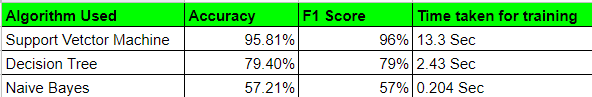

1. Comparing these three models it is clear that the support vector machine algorithm is performing well with accuracy of 95.81%.
2. Also the time taken by SVM model for training is also 13.3 Sec which is little high.
3. Decision tree algorithm is giving decent accuracy of about 80% drastically reducing training time to 2.43 Sec.
4. Naive bayes is not performing well for this model.

Comparing the results The SUPPORT VECTOR MACHINE Algorithm seems to be better choice for this project.
